# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [212]:
import pandas as pd

## imports for Python, Pandas

In [213]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [214]:
# Define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [215]:
# Use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [216]:
# Further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/



In [217]:
# Load JSON as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [218]:
# Load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

****
## Answer to Question #1
Find the 10 countries with most projects

In [219]:
# Read in JSON file as list 
with open('data/world_bank_projects.json', 'rb') as f:
	json_list = json.load(f)

# Convert as Pandas dataframe
df = pd.DataFrame(json_list)

# Inspect the type and columns
print(type(df))
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')


In [220]:
# Inspect subset of relevant columns and how many rows 
subset_df1 = df[['countryshortname', 'project_name']]
print(subset_df1.shape)
print(subset_df1.head())

(500, 2)
     countryshortname                                       project_name
0            Ethiopia  Ethiopia General Education Quality Improvement...
1             Tunisia          TN: DTF Social Protection Reforms Support
2              Tuvalu  Tuvalu Aviation Investment Project - Additiona...
3  Yemen, Republic of   Gov't and Civil Society Organization Partnership
4             Lesotho  Second Private Sector Competitiveness and Econ...


In [221]:
# Drop any duplicates
subset_df1.drop_duplicates()
print(subset_df1.shape)

# Get frequency count of 10 countries with the most projects, grouped by countryshortname 
subset_df1 = subset_df1.groupby("countryshortname").size().sort_values(ascending = False)[:10]

# Reset the index
subset_df1 = subset_df1.reset_index()

# Rename columns to something more sensible
subset_df1.columns = ['country_name', 'total_count']

# Set the country_name column as the index
subset_df1 = subset_df1.set_index('country_name')

print(subset_df1)

(500, 2)
                    total_count
country_name                   
Indonesia                    19
China                        19
Vietnam                      17
India                        16
Yemen, Republic of           13
Nepal                        12
Bangladesh                   12
Morocco                      12
Mozambique                   11
Africa                       11


Text(0.5, 1.0, 'Countries with the Most Projects')

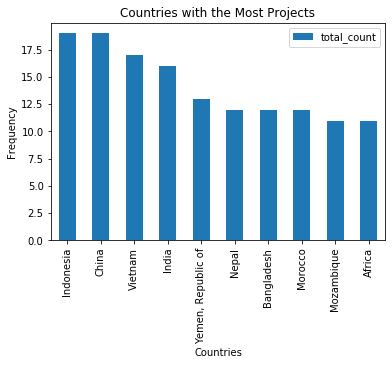

In [222]:
# Plot a bar graph of the 10 countries with the most projects
import matplotlib.pyplot as plt
plot_df = subset_json_df1
plot_df.plot(kind = 'bar')
plt.xlabel('Countries')
plt.ylabel('Frequency')
plt.title('Countries with the Most Projects')

****
## Answer to Question #2
Find the top 10 major project themes (using column 'mjtheme_namecode')

In [223]:
# Read in JSON file as list 
with open('data/world_bank_projects.json', 'rb') as f:
	json_list = json.load(f)

# Use normalization to create a table from nested mjtheme_namecode column
df1 = json_normalize(json_list,'mjtheme_namecode')

# Inspect the subset dataframe and how many rows there are
print(df1.shape)
print(df1.head())

(1499, 2)
  code                                   name
0    8                      Human development
1   11                                       
2    1                    Economic management
3    6  Social protection and risk management
4    5                  Trade and integration


In [224]:
# Group data by name column and count the number of codes according to each name
df1 = df1.groupby('name')['code'].count()

# Reset the index
df1 = df1.reset_index()

# Rename columns to something more sensible
df1.columns = ['theme_name', 'total_count']

# Get subset of data where theme name is not empty
df1 = df1.loc[df1.theme_name != '']

# Set theme_name column as the index
df1 = df1.set_index('theme_name')

# Sort the data by top 10 project name counts in descending order
df1 = df1.sort_values('total_count', ascending=False)[:10]
print(df1)

                                              total_count
theme_name                                               
Environment and natural resources management          223
Rural development                                     202
Human development                                     197
Public sector governance                              184
Social protection and risk management                 158
Financial and private sector development              130
Social dev/gender/inclusion                           119
Trade and integration                                  72
Urban development                                      47
Economic management                                    33


Text(0.5, 1.0, 'Top 10 Project Themes')

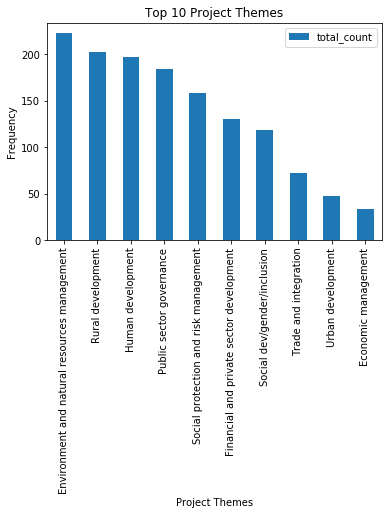

In [225]:
# Plot a bar graph of the top 10 project themes
plot_df = df1
plot_df.plot(kind = 'bar')
plt.xlabel('Project Themes')
plt.ylabel('Frequency')
plt.title('Top 10 Project Themes')

****
## Answer to Question #3
In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [226]:
import numpy as np

# Use normalization to create a table from nested mjtheme_namecode column
json_normalized_df2 = json_normalize(json_list, 'mjtheme_namecode')

# Create dictionary with key:code and value:project name 
df_key = {'1': 'Economic management',
          '2': 'Public sector governance',
          '3': 'Rule of law	',
          '4': 'Financial and private sector development',
          '5': 'Trade and integration',
          '6': 'Social protection and risk management',
          '7': 'Social dev/gender/inclusion',
          '8': 'Human development',
          '9': 'Urban development',
          '10': 'Rural development',
          '11': 'Environment and natural resources management'
}

# Loop through dictionary df_key and set the correct values in the dataframe 
for code in df_key:
    json_normalized_df2.loc[json_normalized_df2.code == code, ['name']] = df_key[code]

print(json_normalized_df2)

     code                                          name
0       8                             Human development
1      11  Environment and natural resources management
2       1                           Economic management
3       6         Social protection and risk management
4       5                         Trade and integration
5       2                      Public sector governance
6      11  Environment and natural resources management
7       6         Social protection and risk management
8       7                   Social dev/gender/inclusion
9       7                   Social dev/gender/inclusion
10      5                         Trade and integration
11      4      Financial and private sector development
12      6         Social protection and risk management
13      6         Social protection and risk management
14      2                      Public sector governance
15      4      Financial and private sector development
16     11  Environment and natural resources man